In [1]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
import torch.nn.functional as nf
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import cv2
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MultiLabelBinarizer 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
## read and clean the training dataset
data = pd.read_csv('./data/training_set(1).csv')
# glimpse at the train data
data.head()
data.info()

# 数据预处理--编码
# relabel name information
name_column = data['Name']
label_encoder = LabelEncoder()
encoded_names = label_encoder.fit_transform(name_column)
# 将编码后的结果添加到data中
data['Name'] = encoded_names

# relabel Occupation information
occupation_column = data['Occupation']
label_encoder = LabelEncoder()
encoded_occupations = label_encoder.fit_transform(occupation_column)
# 将编码后的结果添加到data中
data['Occupation'] = encoded_occupations

# relabel Type_of_Loan information
type_of_Loan_column = data['Type_of_Loan']
labels_column = type_of_Loan_column.str.split(',')
label_encoder = MultiLabelBinarizer()
encoded_type_of_Loan = label_encoder.fit_transform(labels_column)
# 创建包含编码后结果的新DataFrame
encoded_df = pd.DataFrame(encoded_type_of_Loan, columns = label_encoder.classes_)
# 将编码后的结果添加到原始DataFrame中
type_of_loan_index = data.columns.get_loc('Type_of_Loan')
data = pd.concat([data.iloc[:, :type_of_loan_index + 1], encoded_df, data.iloc[:, type_of_loan_index + 1:]], axis=1)
# 删除原始包含多个标签的列
data.drop(columns=['Type_of_Loan'], inplace=True)


# relabel Credit_Mix information
credit_mix_column = data['Credit_Mix']
label_encoder = LabelEncoder()
encoded_credit_mix = label_encoder.fit_transform(credit_mix_column)
# 将编码后的结果添加到data中
data['Credit_Mix'] = encoded_credit_mix

# relabel Payment_Behaviour information
payment_behaviour_column = data['Payment_Behaviour']
label_encoder = LabelEncoder()
encoded_payment_behaviour = label_encoder.fit_transform(payment_behaviour_column)
# 将编码后的结果添加到data中
data['Payment_Behaviour'] = encoded_payment_behaviour

# relabel Payment_of_Min_Amount information
payment_of_min_amount_column = data['Payment_of_Min_Amount']
label_encoder = LabelEncoder()
encoded_payment_of_min_amount = label_encoder.fit_transform(payment_of_min_amount_column)
# 将编码后的结果添加到data中
data['Payment_of_Min_Amount'] = encoded_payment_of_min_amount

# relabel Credit_Score(label column) information
data.loc[data.Credit_Score == 'Good', 'Credit_Score'] = 0
data.loc[data.Credit_Score == 'Standard', 'Credit_Score'] = 1
data.loc[data.Credit_Score == 'Poor', 'Credit_Score'] = 2
print(data.shape)

## 重新输出data到csv检查一下数据是否成功清洗了
# 扔掉第一列
data = data.iloc[:, 1:]
print(data.shape)

##确定要扔掉的列
column_to_drop = ['ID','Customer_ID','SSN']
for col in column_to_drop:
    data = data.drop(columns= col)
print(data.shape)

#在重新输出到.csv检查一下上面的修改是否正确
# data.to_csv('modified_data.csv', index=False)

data = data.to_numpy(dtype=np.float32)
#对挑选的列进行归一化
for ii in range(data.shape[1]-1):
    meanVal=np.mean(data[:,ii])
    stdVal=np.std(data[:,ii])
    data[:,ii]=(data[:,ii]-meanVal)/stdVal

train, val = train_test_split(data, test_size =0.2, random_state=27893,stratify=data[:,-1])




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40068 entries, 0 to 40067
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                40068 non-null  int64  
 1   ID                        40068 non-null  int64  
 2   Customer_ID               40068 non-null  int64  
 3   Month                     40068 non-null  int64  
 4   Name                      40068 non-null  object 
 5   Age                       40068 non-null  int64  
 6   SSN                       40068 non-null  int64  
 7   Occupation                40068 non-null  object 
 8   Annual_Income             40068 non-null  float64
 9   Monthly_Inhand_Salary     40068 non-null  float64
 10  Num_Bank_Accounts         40068 non-null  int64  
 11  Num_Credit_Card           40068 non-null  int64  
 12  Interest_Rate             40068 non-null  int64  
 13  Num_of_Loan               40068 non-null  int64  
 14  Type_o

In [3]:
## read and clean the testing dataset
data = pd.read_csv('./data/test_set.csv')
# glimpse at the train data
data.head()
data.info()

# 数据清洗
# relabel name information
name_column = data['Name']
label_encoder = LabelEncoder()
encoded_names = label_encoder.fit_transform(name_column)
# 将编码后的结果添加到data中
data['Name'] = encoded_names

# relabel Occupation information
occupation_column = data['Occupation']
label_encoder = LabelEncoder()
encoded_occupations = label_encoder.fit_transform(occupation_column)
# 将编码后的结果添加到data中
data['Occupation'] = encoded_occupations

# relabel Type_of_Loan information
type_of_Loan_column = data['Type_of_Loan']
labels_column = type_of_Loan_column.str.split(',')
label_encoder = MultiLabelBinarizer()
encoded_type_of_Loan = label_encoder.fit_transform(labels_column)
# 创建包含编码后结果的新DataFrame
encoded_df = pd.DataFrame(encoded_type_of_Loan, columns = label_encoder.classes_)
# 将编码后的结果添加到原始DataFrame中
type_of_loan_index = data.columns.get_loc('Type_of_Loan')
data = pd.concat([data.iloc[:, :type_of_loan_index + 1], encoded_df, data.iloc[:, type_of_loan_index + 1:]], axis=1)
# 删除原始包含多个标签的列
data.drop(columns=['Type_of_Loan'], inplace=True)

# relabel Credit_Mix information
credit_mix_column = data['Credit_Mix']
label_encoder = LabelEncoder()
encoded_credit_mix = label_encoder.fit_transform(credit_mix_column)
# 将编码后的结果添加到data中
data['Credit_Mix'] = encoded_credit_mix

# relabel Payment_Behaviour information
payment_behaviour_column = data['Payment_Behaviour']
label_encoder = LabelEncoder()
encoded_payment_behaviour = label_encoder.fit_transform(payment_behaviour_column)
# 将编码后的结果添加到data中
data['Payment_Behaviour'] = encoded_payment_behaviour

# relabel Payment_of_Min_Amount information
payment_of_min_amount_column = data['Payment_of_Min_Amount']
label_encoder = LabelEncoder()
encoded_payment_of_min_amount = label_encoder.fit_transform(payment_of_min_amount_column)
# 将编码后的结果添加到data中
data['Payment_of_Min_Amount'] = encoded_payment_of_min_amount

# relabel Credit_Score(label column) information
data.loc[data.Credit_Score == 'Good', 'Credit_Score'] = 0
data.loc[data.Credit_Score == 'Standard', 'Credit_Score'] = 1
data.loc[data.Credit_Score == 'Poor', 'Credit_Score'] = 2
print(data.shape)

## 重新输出data到csv检查一下数据是否成功清洗了
# 扔掉第一列
data = data.iloc[:, 1:]
print(data.shape)

##确定要扔掉的列
column_to_drop = ['ID','Customer_ID','SSN']
for col in column_to_drop:
    data = data.drop(columns= col)
print(data.shape)

data = data.to_numpy(dtype=np.float32)
#对挑选的列进行归一化
for ii in range(data.shape[1]-1):
    meanVal=np.mean(data[:,ii])
    stdVal=np.std(data[:,ii])
    data[:,ii]=(data[:,ii]-meanVal)/stdVal

test = data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                9823 non-null   int64  
 1   ID                        9823 non-null   int64  
 2   Customer_ID               9823 non-null   int64  
 3   Month                     9823 non-null   int64  
 4   Name                      9823 non-null   object 
 5   Age                       9823 non-null   int64  
 6   SSN                       9823 non-null   int64  
 7   Occupation                9823 non-null   object 
 8   Annual_Income             9823 non-null   float64
 9   Monthly_Inhand_Salary     9823 non-null   float64
 10  Num_Bank_Accounts         9823 non-null   int64  
 11  Num_Credit_Card           9823 non-null   int64  
 12  Interest_Rate             9823 non-null   int64  
 13  Num_of_Loan               9823 non-null   int64  
 14  Type_of_

In [4]:
class Diabetes_dataset(torch.utils.data.Dataset):
  def __init__(self, setname):
    self.setname=setname
    if setname=='train':
      X=train
    elif setname=='val':
      X=val
    elif setname=='test':
      X=test
    self.X = X

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    if (self.setname=='train') or (self.setname=='val'):
      data = self.X[index,0:-1]
      data = torch.tensor(data, dtype=torch.float32)
      label = self.X[index,-1]
      label = torch.tensor(label, dtype=torch.int64)
      data_pair = {'X': data, 'y': label}
    elif self.setname=='test':
      data = self.X[index,0:-1]
      data = torch.tensor(data, dtype=torch.float32)
      data_pair = {'X': data}
    return data_pair

In [5]:
###使用决策树模型评估
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(criterion='entropy')     #实例化
X_train = train[:,0:-1]
y_train = train[:,-1]
X_val = val[:,0:-1]
y_val = val[:,-1]
X_test = test[:,0:-1]
decision_tree.fit(X_train,y_train) #用训练集数据训练模型
val_result = decision_tree.score(X_val,y_val) 
print(val_result)
y_predict = decision_tree.predict(X_test)
##对决策树进行优化
decision_tree_optim = tree.DecisionTreeClassifier(criterion='entropy')
param_grid = {'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]}
optim_tree = GridSearchCV(decision_tree_optim, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
optim_tree.fit(X_train,y_train)
val_result = optim_tree.score(X_val,y_val) 
print(val_result)
print(optim_tree.best_params_)
print(optim_tree.best_estimator_)
y_predict = optim_tree.predict(X_test)

0.6952832543049663
0.7127526828050911
{'max_depth': 6}
DecisionTreeClassifier(criterion='entropy', max_depth=6)


In [6]:
###使用支持向量机评估
from sklearn.svm import SVC

svm_classification =SVC(probability=True)
X_train = train[:,0:-1]
y_train = train[:,-1]
X_val = val[:,0:-1]
y_val = val[:,-1]
X_test = test[:,0:-1]
svm_classification.fit(X_train,y_train) #用训练集数据训练模型
val_result = svm_classification.score(X_val,y_val) 
print(val_result)
y_predict = svm_classification.predict(X_test)
##对支持向量机进行优化
svm_optim = SVC(probability=True)
param_grid = {'C':[1,5,10]}
optim_svm = GridSearchCV(svm_optim, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
optim_svm.fit(X_train,y_train)
val_result = optim_svm.score(X_val,y_val) 
print(val_result)
print(optim_svm.best_params_)
print(optim_svm.best_estimator_)
y_predict = optim_svm.predict(X_test)

0.7256051909158971
0.7494384826553532
{'C': 10}
SVC(C=10, probability=True)


In [7]:
###使用KNN评估
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
X_train = train[:,0:-1]
y_train = train[:,-1]
X_val = val[:,0:-1]
y_val = val[:,-1]
X_test = test[:,0:-1]
knn.fit(X_train,y_train) #用训练集数据训练模型
val_result = knn.score(X_val,y_val) 
print(val_result)
y_predict = knn.predict(X_test)
##对knn进行优化
knn_optim = KNeighborsClassifier()
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12]}
optim_knn = GridSearchCV(knn_optim, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
optim_knn.fit(X_train,y_train)
val_result = optim_knn.score(X_val,y_val) 
print(val_result)
print(optim_knn.best_params_)
print(optim_knn.best_estimator_)
y_predict = optim_knn.predict(X_test)

0.7108809583229349
0.7208634888944347
{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)


In [16]:
# 使用集成学习中的随机森林评估
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=0,n_jobs=12)
X_train = train[:,0:-1]
y_train = train[:,-1]
X_val = val[:,0:-1]
y_val = val[:,-1]
X_test = test[:,0:-1]
rfc.fit(X_train,y_train) #用训练集数据训练模型
val_result = rfc.score(X_val,y_val) 
print(val_result)
y_predict = rfc.predict(X_test)
##对随机森林进行优化
rfc_optim = RandomForestClassifier(random_state=0,n_jobs=4)
param_grid = {'n_estimators': [100,200,400,800,1000],'max_depth':[10,20,30,50]}
rfc_optim_GSCV = GridSearchCV(rfc_optim, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
rfc_optim_GSCV.fit(X_train,y_train)
val_result = rfc_optim_GSCV.score(X_val,y_val) 
print(val_result)
print(rfc_optim_GSCV.best_params_)
print(rfc_optim_GSCV.best_estimator_)
# y_predict = rfc_optim_GSCV.predict(X_test)
##采取优化后的随机森林模型进行预测并写入结果
rfc_final = RandomForestClassifier(n_estimators=1000,max_depth=50,random_state=0,n_jobs=12)
rfc_final.fit(X_train,y_train) #用训练集数据训练模型
val_result = rfc_final.score(X_val,y_val) 
print(val_result)
y_predict = rfc_final.predict(X_test)
##将随机森林预测结果写入.csv文件中
with open('./Prediction.csv', 'w') as file:
    file.write("Credit_Score" + '\n')
    # 遍历列表中的元素并将其写入文件
    for item in y_predict:
        if item == 0:
            file.write('Good' + '\n')
        elif item == 1:
            file.write('Standard' + '\n')
        elif item == 2:
            file.write('Poor' + '\n')

0.7333416521088096
0.7922385824806588
{'max_depth': 50, 'n_estimators': 1000}
RandomForestClassifier(max_depth=50, n_estimators=1000, n_jobs=4,
                       random_state=0)
0.7922385824806588


In [17]:
## 使用集成学习+soft_voting评估
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators=1000,max_depth=50,random_state=0,n_jobs=12)
clf2 = SVC(kernel='rbf', C = 10, probability=True)
clf3 = KNeighborsClassifier(n_neighbors=3)
eclf = VotingClassifier(estimators=[('rf',clf1),('svm',clf2),('knn',clf3)],
                        voting='soft',weights=[10,4,2])
X_train = train[:,0:-1]
y_train = train[:,-1]
X_val = val[:,0:-1]
y_val = val[:,-1]
X_test = test[:,0:-1]
eclf.fit(X_train,y_train) #用训练集数据训练模型
val_result = eclf.score(X_val,y_val) 
print(val_result)
y_predict = eclf.predict(X_test)

0.7881207886199152


In [10]:
#network setting
#device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#network structure

# MLP_net = nn.Sequential(nn.Linear(33, 512),nn.Sigmoid() ,nn.Linear(512, 256),nn.ReLU(),nn.Linear(256, 128),nn.ReLU(),
# nn.Linear(128, 64),nn.ReLU(),nn.Linear(64, 32),nn.ReLU(),
# nn.Linear(32, 3),nn.ReLU())

class MLP_net(nn.Module):
        # fc 全连接层
        def __init__(self):
            super().__init__()
            self.fc1 = nn.Linear(33,512)
            # self.dropout1 = nn.Dropout(p=0.5)  # dropout训练
            self.fc2 = nn.Linear(512,256)
            # self.dropout2 = nn.Dropout(p=0.5)  # dropout训练
            self.fc3 = nn.Linear(256,128)
            self.fc4 = nn.Linear(128,64)
            self.fc5 = nn.Linear(64,32)
            self.fc6 = nn.Linear(32,3)
            # self.sigmoid = nn.Sigmoid()
            
        def forward(self, x):
            x = nf.relu(self.fc1(x))
            # x = self.dropout1(x)
            x = nf.relu(self.fc2(x))
            # x = self.dropout2(x)
            x = nf.relu(self.fc3(x))
            x = nf.relu(self.fc4(x))
            x = nf.relu(self.fc5(x))
            x = self.fc6(x)
            # x = nf.relu(self.fc6(x))
            return x

# net = net.to(device)

net = MLP_net().to(device)
#initialization
# def init_weights(m):
#     # if type(m) == nn.Linear:
#         nn.init.normal_(m.weight, std=0.01)

# def init_weights(m):
#     if type(m) == nn.Linear:
#         torch.nn.init.uniform_(m.weight,a=-0.1,b=0.1)
#         m.bias.data.fill_(0.01)
# net.apply(init_weights)
lr, st_epoch,num_epoch = 0.0001,0,60
Loss = nn.CrossEntropyLoss()
optim = torch.optim.AdamW(net.parameters(),lr=lr,betas=(0.9,0.999),eps=1e-8,weight_decay=0.01,amsgrad=False)#0.001
# optim = torch.optim.Adam(net.parameters(), lr=lr)
scheduler =  torch.optim.lr_scheduler.CosineAnnealingLR(optimizer =optim,T_max=num_epoch,eta_min= 1e-6,last_epoch=-1)
#load train and val data
train_batch_size = 256
dataset_train = Diabetes_dataset(setname='train')
loader_train = DataLoader(dataset_train, batch_size=train_batch_size, shuffle=True, num_workers=0, drop_last=True)
num_data_train = len(dataset_train)
num_batch_train = np.ceil(num_data_train / train_batch_size)
# print(num_data_train)
# print(num_batch_train)
val_batch_size = 128
dataset_val = Diabetes_dataset(setname='val')
loader_val = DataLoader(dataset_val, batch_size=val_batch_size, shuffle=False, num_workers=0, drop_last=True)
num_data_val = len(dataset_val)
num_batch_val = np.ceil(num_data_val / val_batch_size)
# print(num_data_val)
# print(num_batch_val)

#get accuracy
def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())


In [11]:
#training process
#log to record loss and acc
log=np.zeros([num_epoch,3])#train_loss,val_loss,val_accuracy
for epoch in range(st_epoch+1, num_epoch + 1):
    #training
    net.train()
    train_loss = []
    train_acc=[]
    for batch, data in enumerate(loader_train, 1):
        # forward pass
        image = data['X'].to(device)
        label = data['y'].to(device).reshape(-1)
        # print(image.shape, label.shape)
        output = net(image)
        # backward pass
        optim.zero_grad()
        loss = Loss(output, label)
        loss.backward()
        optim.step()
        train_loss += [loss.item()]
        print("TRAIN : EPOCH %04d / %04d | BATCH %04d / %04d | LOSS %.4f" %  (epoch, num_epoch, batch, num_batch_train, np.mean(train_loss)))
    log[epoch-1,0]=np.mean(train_loss)
    scheduler.step()
    #validation
    net.eval()
    val_loss = []
    val_acc=[]
    for batch, data in enumerate(loader_val, 1):
        with torch.no_grad():
            # forward pass
            image = data['X'].to(device)
            label = data['y'].to(device).reshape(-1)
            output = net(image)
            loss = Loss(output, label)
            val_loss.append(loss.item())
            val_acc+=[accuracy(output,label)]
            print("VALID : EPOCH %04d / %04d | BATCH %04d / %04d | LOSS %.4f" % (epoch, num_epoch, batch, num_batch_val, np.mean(val_loss)))
    log[epoch-1,1]=np.mean(val_loss)
    log[epoch-1,2]=np.sum(val_acc)/(num_batch_val*val_batch_size)

/tmp/ipykernel_1347514/3705886184.py:20: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.int64)


TRAIN : EPOCH 0001 / 0060 | BATCH 0001 / 0126 | LOSS 1.1477
TRAIN : EPOCH 0001 / 0060 | BATCH 0002 / 0126 | LOSS 1.1324
TRAIN : EPOCH 0001 / 0060 | BATCH 0003 / 0126 | LOSS 1.1308
TRAIN : EPOCH 0001 / 0060 | BATCH 0004 / 0126 | LOSS 1.1331
TRAIN : EPOCH 0001 / 0060 | BATCH 0005 / 0126 | LOSS 1.1325
TRAIN : EPOCH 0001 / 0060 | BATCH 0006 / 0126 | LOSS 1.1313
TRAIN : EPOCH 0001 / 0060 | BATCH 0007 / 0126 | LOSS 1.1306
TRAIN : EPOCH 0001 / 0060 | BATCH 0008 / 0126 | LOSS 1.1291
TRAIN : EPOCH 0001 / 0060 | BATCH 0009 / 0126 | LOSS 1.1287
TRAIN : EPOCH 0001 / 0060 | BATCH 0010 / 0126 | LOSS 1.1275
TRAIN : EPOCH 0001 / 0060 | BATCH 0011 / 0126 | LOSS 1.1276
TRAIN : EPOCH 0001 / 0060 | BATCH 0012 / 0126 | LOSS 1.1266
TRAIN : EPOCH 0001 / 0060 | BATCH 0013 / 0126 | LOSS 1.1256
TRAIN : EPOCH 0001 / 0060 | BATCH 0014 / 0126 | LOSS 1.1237
TRAIN : EPOCH 0001 / 0060 | BATCH 0015 / 0126 | LOSS 1.1230
TRAIN : EPOCH 0001 / 0060 | BATCH 0016 / 0126 | LOSS 1.1225
TRAIN : EPOCH 0001 / 0060 | BATCH 0017 /

[[1.00131097 0.84880096 0.53844246]
 [0.7694823  0.73081446 0.64670139]
 [0.72129673 0.70377832 0.65364583]
 [0.69831092 0.68448244 0.68067956]
 [0.68497121 0.67707957 0.68675595]
 [0.67828127 0.67268268 0.68663194]
 [0.67206699 0.66816693 0.69568452]
 [0.66758016 0.66538062 0.69357639]
 [0.66344287 0.66350495 0.69456845]
 [0.65970985 0.66025916 0.69568452]
 [0.65559291 0.65782654 0.69469246]
 [0.65187189 0.65770168 0.69742063]
 [0.64904664 0.65494158 0.69518849]
 [0.64582486 0.65435424 0.6938244 ]
 [0.64234271 0.65182649 0.69890873]
 [0.63877263 0.65029791 0.69568452]
 [0.63646208 0.65013129 0.69717262]
 [0.63320624 0.65003882 0.69394841]
 [0.62966027 0.64649567 0.69717262]
 [0.62657957 0.64595074 0.69866071]
 [0.6228577  0.64572324 0.69853671]
 [0.62110977 0.64556311 0.69928075]
 [0.61763116 0.64503308 0.69742063]
 [0.61433041 0.64287538 0.70114087]
 [0.61225443 0.6433746  0.70064484]
 [0.60933286 0.64310022 0.70039683]
 [0.6060502  0.64087864 0.70300099]
 [0.60375464 0.64138051 0.70

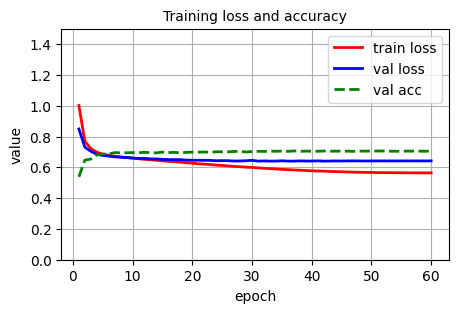

In [12]:
#plot the curve of loss and acc
print(log)
x=np.arange(num_epoch)
x=x+1
plt.figure(figsize=(5,3))
plt.plot(x,log[:,0],linestyle='-',color='r',label='train loss',linewidth=2)
plt.plot(x,log[:,1],linestyle='-',color='b',label='val loss',linewidth=2)
plt.plot(x,log[:,2],linestyle='--',color='g',label='val acc',linewidth=2)
plt.title('Training loss and accuracy',fontsize=10)
plt.xlabel('epoch',fontsize=10)
plt.ylabel('value',fontsize=10)
plt.legend(fontsize=10)
plt.ylim(0,1.5)
plt.grid()
plt.show()


In [13]:
test_batch_size=128

dataset= Diabetes_dataset(setname='test')
loader= DataLoader(dataset, batch_size=test_batch_size, shuffle=False, num_workers=0, drop_last=False)
num_data = len(dataset)
num_batch = np.ceil(num_data / test_batch_size)

# ylabel=np.zeros(len(loader)*batch_size )
# ypredict=np.zeros(len(loader)*batch_size)

ypredict=np.zeros((len(loader)*test_batch_size + (test.shape[0]-len(loader)*test_batch_size)))
net.eval()

for batch, data in enumerate(loader, 1):
    with torch.no_grad():
        image = data['X'].to(device)
        # label = data['y'].to(device).reshape(-1)
        output = net(image)
        # print(output.shape)
    # ylabel[(batch-1)*batch_size:batch*batch_size]=label.to('cpu').numpy().reshape(batch_size)
    # ypredict[(batch-1)*batch_size:batch*batch_size]=output.to('cpu').numpy().argmax(axis=1).reshape(batch_size)
    if output.shape[0] == 128:
        ypredict[(batch-1)*test_batch_size:batch*test_batch_size]=output.to('cpu').numpy().argmax(axis=1).reshape(test_batch_size)
    else:
        ypredict[(batch-1)*test_batch_size:len(ypredict)]=output.to('cpu').numpy().argmax(axis=1) 
print(ypredict)

[1. 1. 0. ... 1. 2. 2.]
